In [16]:
# Import libraries
import google.generativeai as genai
import dotenv
import pandas as pd
import os
dotenv.load_dotenv()
import time


In [17]:
df = pd.read_csv('../dataset/cleaned_dataset_railguard.csv')

In [18]:
df.head()

,Question,ground_truth
0,How do I apply for CPT?,True
1,What documents are required for CPT?,True
2,How long does CPT processing take?,True
3,Can I work before receiving CPT authorization?,True
4,Do I need to pay any fees for CPT?,True


In [19]:
# Count values in ground_truth column
df['ground_truth'].value_counts()

ground_truth
True     127
False    126
Name: count, dtype: int64

In [44]:
class Railguard:
    def __init__(self) -> None:
        api_key = os.getenv("GOOGLE_API_KEY")
        model_name = 'gemini-1.5-flash'
        genai.configure(api_key=api_key)
        railguard_prompt = """
                            You are a railguard meant to judge if the user question is related to Law or not. Particularly if it is related to rules or regulations or if the question asks anything related to laws or rules or instruction related to international students studying in the United States on an F1 Visa. 
                            If the question is related, reply True; else, reply False.
                            """
        self.railguard_model = genai.GenerativeModel(model_name, system_instruction=railguard_prompt)
        self.chat_model = genai.GenerativeModel(model_name)

    def railguard(self, question: str) -> bool:
        response = self.railguard_model.generate_content(question)
        return response.text.strip().lower() == "true"
    
    def chat(self, question: str) -> str:
        valid_question = self.railguard(question)
        print(valid_question)
        if valid_question:
            response = self.chat_model.generate_content(question)
            response = response.text
        else:
            response = "I am sorry, I am not programmed to answer this question."
        return response.strip()
        


In [45]:
railguard_obj = Railguard()

In [21]:

# result_list = []

# # Iterate through DataFrame rows
# for index, row in df.iterrows():
#     question = row['Question']
#     ground_truth = row['ground_truth']
#     prediction = railguard_obj.railguard(question)
    
#     # Append results to the list
#     result_list.append({'question': question, 'ground_truth': ground_truth, 'prediction': prediction})
    
#     # Pause to avoid excessive API calls
#     time.sleep(3)
#     if index % 10 == 0:
#         print(f"Processed {index} rows")
#         time.sleep(10)    

# # Convert list to DataFrame
# result_df = pd.DataFrame(result_list)


Processed 0 rows
Processed 10 rows
Processed 20 rows
Processed 30 rows
Processed 40 rows
Processed 50 rows
Processed 60 rows
Processed 70 rows
Processed 80 rows
Processed 90 rows
Processed 100 rows
Processed 110 rows
Processed 120 rows
Processed 130 rows
Processed 140 rows
Processed 150 rows
Processed 160 rows
Processed 170 rows
Processed 180 rows
Processed 190 rows
Processed 200 rows
Processed 210 rows
Processed 220 rows
Processed 230 rows
Processed 240 rows
Processed 250 rows


In [39]:
# Initialize Railguard
railguard_obj = Railguard()

In [22]:
#save the result to a csv file
result_df.to_csv('../results/railguard_eval/result.csv', index=False)


In [26]:
# Calculate accuracy
accuracy = (result_df['ground_truth'] == result_df['prediction']).mean()
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
confusion_matrix = pd.crosstab(result_df['ground_truth'], result_df['prediction'])
print(confusion_matrix)

# Calculate precision, recall, and F1 score
precision = confusion_matrix[True][True] / confusion_matrix.sum(axis=0)[True]
recall = confusion_matrix[True][True] / confusion_matrix.sum(axis=1)[True]
f1_score = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Accuracy: 1.00
prediction    False  True 
ground_truth              
False           126      0
True              1    126
Precision: 1.00
Recall: 0.99
F1 Score: 1.00


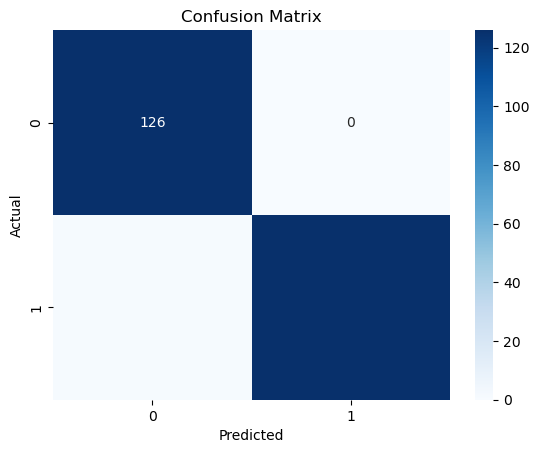

In [27]:
# using scale learn to print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(result_df['ground_truth'], result_df['prediction'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [46]:
question = "What are the rules for international students studying in the United States on an F1 Visa?"
response = railguard_obj.chat(question)
print(response)

True
International students in the United States on an F-1 visa must adhere to a strict set of rules. Failure to comply can result in the termination of their visa status and deportation.  The rules can be broadly categorized as follows:

**I. Maintaining Student Status:**

* **Full-Time Enrollment:**  Students must maintain a full course of study as defined by their Designated School Official (DSO) at their accredited institution. This usually means taking a minimum number of credit hours each semester or quarter.  Part-time study is generally only permitted under specific circumstances (e.g., final semester, medical reasons) and requires permission from the DSO.
* **Academic Progress:** Students must maintain satisfactory academic progress, as defined by their school. This usually involves maintaining a minimum GPA or passing a certain percentage of their courses.  Failure to meet these standards can jeopardize their visa status.
* **Program Completion:** Students must complete their

In [48]:
question = "what kinda of ice cream do you like?"
response = railguard_obj.chat(question)
print(response)

False
I am sorry, I am not programmed to answer this question.
